<!-- lume-impact detected Jupyter and will use HTML for rendering. -->

  0%|          | 0/1497 [00:00<?, ?ele/s]

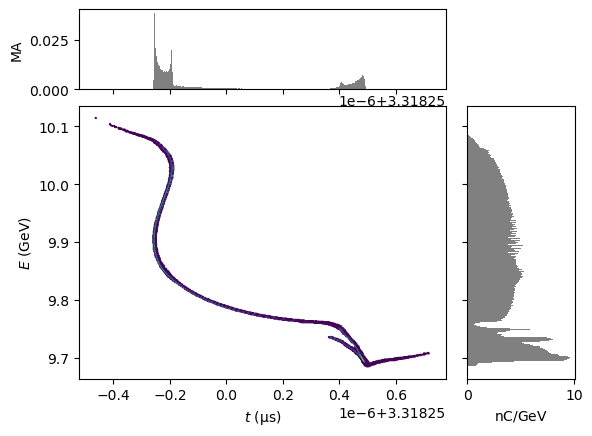

In [1]:
from pytao import Tao
from pmd_beamphysics import ParticleGroup
import random
import numpy as np

tao = Tao(lattice_file='2025-06-06_lat_nominal.bmad', plot='mpl')

pfile = '2024-10-14_twoBunch_mod.h5' #Produced by running OpenPMD_to_Bmad() on "2024-10-14_twoBunch.h5"
P = ParticleGroup(pfile)

track_start = 'L0AFEND'
track_end = 'PENT'

tao.cmd(f'set beam_init position_file = {pfile}')
tao.cmd(f'set beam_init n_particle = {len(P)}')
tao.cmd(f'set beam_init bunch_charge = {P.charge}')

tao.cmd(f'call Activate_CSR.tao')
tao.cmd('csron')

tao.track_beam(track_start=track_start, track_end=track_end)

# Get final particles
P1 = ParticleGroup(data = tao.bunch_data(track_end))
P1.plot('t', 'energy')






  0%|          | 0/1497 [00:00<?, ?ele/s]

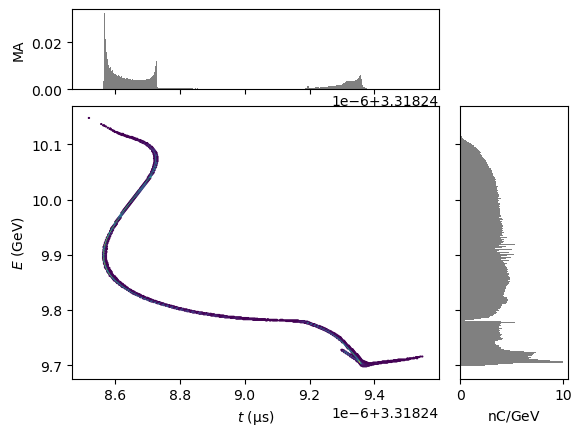

In [2]:
#Now try with PHI0_ERR = 0.0027 rad/2pi 
tao = Tao(lattice_file='2025-06-06_lat_perturbed.bmad', plot='mpl')
tao.cmd(f'set beam_init position_file = {pfile}')
tao.cmd(f'set beam_init n_particle = {len(P)}')
tao.cmd(f'set beam_init bunch_charge = {P.charge}')

tao.cmd(f'call Activate_CSR.tao')
tao.cmd('csron')

tao.track_beam(track_start=track_start, track_end=track_end)



# Get final particles
P2 = ParticleGroup(data = tao.bunch_data(track_end))
P2.plot('t', 'energy')

In [3]:
tao.cmd("show bmad")

['',
 'Bmad_com Parameters (use "set bmad_com" to change):',
 '  %max_aperture_limit              =   1.00000000E+03',
 '  %d_orb                           =   1.00000000E-05  1.00000000E-05  1.00000000E-05  1.00000000E-05  1.00000000E-05  1.00000000E-05',
 '  %default_ds_step                 =   2.00000000E-01',
 '  %significant_length              =   1.00000000E-10',
 '  %rel_tol_tracking                =   1.00000000E-09',
 '  %abs_tol_tracking                =   1.00000000E-12',
 '  %rel_tol_adaptive_tracking       =   1.00000000E-08',
 '  %abs_tol_adaptive_tracking       =   1.00000000E-10',
 '  %autoscale_amp_rel_tol           =   1.00000000E-06',
 '  %autoscale_amp_abs_tol           =   1.00000000E-01',
 '  %autoscale_phase_tol             =   1.00000000E-05',
 '  %init_ds_adaptive_tracking       =   1.00000000E-03',
 '  %min_ds_adaptive_tracking        =   0.00000000E+00',
 '  %electric_dipole_moment          =   0.00000000E+00',
 '  %synch_rad_scale                 =   1.0000

In [4]:
tao.cmd("show ele Q1EL -all")

['Element # 1307',
 'Element Name: Q1EL',
 'Element Type:  "0.813Q23"',
 'Key: Quadrupole',
 'S_start, S:    935.563556,    936.159756',
 'Ref_time_start, Ref_time:  3.120721E-06,  3.122710E-06',
 '',
 'Attribute values:',
 '    1  L                           =  5.9620000E-01 m',
 '    2  TILT                        =  0.0000000E+00 rad      60  TILT_TOT                    =  0.0000000E+00 rad',
 '    4  K1                          =  8.1126112E-01 1/m^2    45  B1_GRADIENT                 = -2.7058380E+01 T/m',
 '   10  FRINGE_TYPE                 =  None (1)               11  FRINGE_AT                   =  Both_Ends (3)',
 '   13  SPIN_FRINGE_ON              =  T (1)',
 '   16  R0_MAG                      =  0.0000000E+00 m        15  R0_ELEC                     =  0.0000000E+00 m',
 '   17  STATIC_LINEAR_MAP           =  F (0)',
 '   23  FQ1                         =  0.0000000E+00 m        24  FQ2                         =  0.0000000E+00 m',
 '   34  X_PITCH                     =  0

In [5]:
tao.cmd("show lat -at csr_method")

['# Values shown are for the Downstream End of each Element (Girder at ref point):',
 '# Index  name       key                      s       l  csr_method',
 '      0  BEGINNING  Beginning_Ele        0.000     ---',
 '      1  DL00       Drift               -0.869  -0.869  Off',
 '      2  LOADLOCKF  Drift                0.000   0.869  Off',
 '      3  BEGINJ     Marker               0.000   0.000',
 '      4  SOL10111   Solenoid             0.000   0.000  Off',
 '      5  CATHODEF   Instrument           0.000   0.000  Off',
 '      6  DL01A      Drift                0.097   0.097  Off',
 '      7  SOL10121#1 Solenoid             0.197   0.100  Off',
 '      8  YC10122    VKicker              0.197   0.000  Off',
 '      9  XC10121    HKicker              0.197   0.000  Off',
 '     10  SQ10122    Multipole            0.197   0.000',
 '     11  CQ10121    Multipole            0.197   0.000',
 '     12  SOL10121#2 Solenoid             0.297   0.100  Off',
 '     13  DL01B      Drift     